# 2022-September-21

In [47]:
from IPython.display import HTML, display, Image
import pandas as pd

For a cavity with different widths, the oscillation period changes: (all have constant height of 2.5)
<table>
  <tr>
    <th>Width</th>
    <th>Oscillation period</th>
    <th>Oscillation type</th>
  </tr>
  <tr>
    <td>1.0</td>
    <td>27</td>
 </tr>
  <tr>
    <td>2.0</td>
    <td>50</td>
  </tr>
  <tr>
    <td>3.0</td>
    <td>40 to 55</td>
  </tr>
      <tr>
    <td>4.0</td>
    <td>160</td>
  </tr>
    <tr>
    <td>6.0</td>
    <td>beginning: 192, end: 129</td>
  </tr>
    <tr>
    <td>10.0</td>
    <td>403</td>
  </tr>
</table> 

For a cavity with different widths, the oscillation period changes: (all have constant height of 1.0)\
The 6th column shows the result for testing a few segment sizes. It provides info on:
- The segment size used to do regression on
- The first iter that this creteria activates DMD
- Number of DMD activation of this segment size

Seg ratio is the ratio of the current size to the previous one.


<table>
  <tr>
    <th>Width</th>    <th>Oscillation period</th>  <td>Oscilation ratio</td>  <th>manual prefered iter for DMD</th> <td>Preferred seg size</td> 
      <th>(segment size, 1st activation iter, num activation)</th>
  </tr>
  <tr>
    <td>1.0</td>   <td>17</td>   <td>-</td>   <td>200</td>   <td>3*17</td> <td>(2*17, 170, 2)(3*17, 306, 3)</td>
 </tr>
  <tr>
    <td>2.0</td>   <td>42</td> <td>1.647</td>  <td>400</td>  <td>2*42</td>  <td>(2*42, 504, 2) (3*42, 630, 2)  (4*42, 672, 1)  (5*42, 840, 1) </td>
  </tr>
  <tr>
    <td>3.0</td>   <td>62</td> <td>1.48</td>  <td>400</td>  <td>3*62</td>   <td>(3*62, 744, 2) (2*62, 2nd update not accurate)</td>
  </tr>
  <tr>
    <td>4.0</td>   <td>84</td> <td>1.35</td>   <td>500</td>    <td>2*84</td>  <td>(2*84, 672) --  (3*84, 756)</td> <td>note:size 100 NotWorking  </td>
  </tr>
    <tr>
    <td>5.0</td>   <td>105</td>   <td>1.25</td>   <td>600</td>   <td>2*105</td>    <td>(2*105, 840, 2) (3*105, 945, 2)</td>
  </tr>
    <tr>
    <td>6.0</td>  <td>124</td>   <td>1.18</td> <td></td>  <td>2*124</td>    <td>(2*124, 744, 2 (2nd one not very good))  (3*124, 1116, 1) </td>
  </tr>
    <tr>
    <td>7.0</td>  <td>149</td>  <td>1.2</td>   <td></td>  <td>2*149</td>  <td>(2*149, 894, 2) (3*149, 1341, 1) </td>
  </tr>
   <tr>
       <td>8.0</td>   <td>172</td> <td>1.154</td>  <td></td>   <td>2*172</td>   <td>(2*172, 1032, 2)  (3*172, 1548, 1)</td>
    </tr> 
    <tr>
    <td>9.0</td>   <td>195</td>   <td>1.134</td>  <td></td>   <td>2*195</td>    <td>(2*195, 1170, 2)  (3*195, 1755, 1)</td>
  </tr>
    <tr>
    <td>10.0</td>   <td>220</td>    <td>1.128</td>    <td></td>   <td>2*220</td>   <td>(2*220, 1320, 1) (3*220, 1980, 1)</td>
  </tr>
</table> 

Of course, using a larger segment gives us a more confidence on when to apply the update, but we might also delay this DMD correction and its benefits.

The plot below is for cavity geometry with different widths and constant height 1:

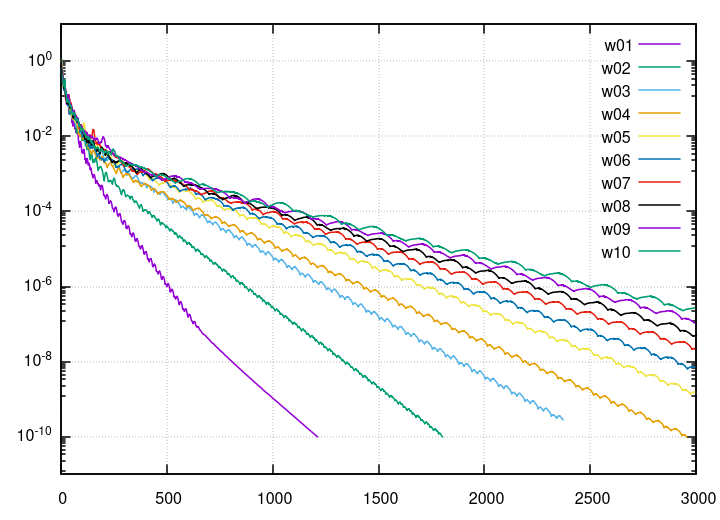

In [58]:
Image("NavierH1.png", width=700)

The plot below shows the effect of update on geometry of width 10 and height 10 with segment size of $2 \times 220$

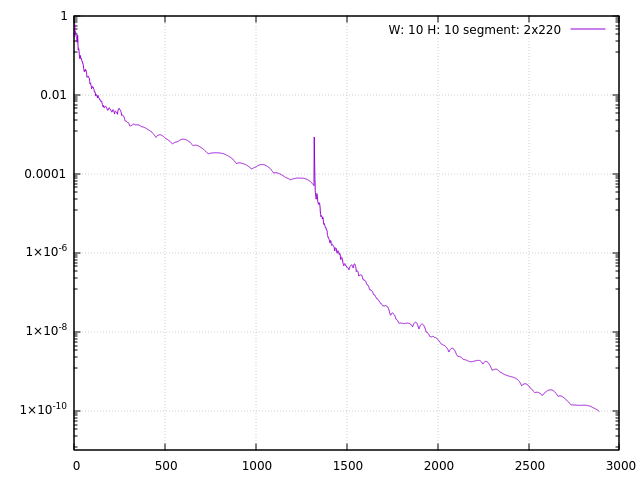

In [60]:
Image("NavierW10H10Seg2*220.png", width=700)